<a href="https://colab.research.google.com/github/Shrivani15/E-learning-platform/blob/main/CAR_RANDOM_FOREST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import ucimlrepo as ui

ModuleNotFoundError: ignored

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

# metadata
print(car_evaluation.metadata)

# variable information
print(car_evaluation.variables)


{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'published_in': '8th Intl Workshop on Expert Systems and their Applications, Avignon, France', 'yea

In [ ]:
import pandas as pd
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data")

In [ ]:
df


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
col_names = ['buying','maint','doors','person','luhboot','safety','class']

In [ ]:
df.columns=col_names

In [ ]:
df

,buying,maint,doors,person,luhboot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   buying   1727 non-null   object
 1   maint    1727 non-null   object
 2   doors    1727 non-null   object
 3   person   1727 non-null   object
 4   luhboot  1727 non-null   object
 5   safety   1727 non-null   object
 6   class    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.describe(include = 'all').T

,count,unique,top,freq
buying,1727,4,high,432
maint,1727,4,high,432
doors,1727,4,3,432
person,1727,3,4,576
luhboot,1727,3,med,576
safety,1727,3,med,576
class,1727,4,unacc,1209


In [ ]:
for col in col_names:
  print(df[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: person, dtype: int64
med      576
big      576
small    575
Name: luhboot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [ ]:
df[df.duplicated()]

,buying,maint,doors,person,luhboot,safety,class


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

df['buying'] = oe.fit_transform(df[['buying']])
df['maint'] = oe.fit_transform(df[['maint']])
df['doors'] = oe.fit_transform(df[['doors']])
df['person'] = oe.fit_transform(df[['person']])
df['luhboot'] = oe.fit_transform(df[['luhboot']])
df['safety'] = oe.fit_transform(df[['safety']])
df['class'] = oe.fit_transform(df[['class']])


In [ ]:
df

,buying,maint,doors,person,luhboot,safety,class
0,3.0,3.0,0.0,0.0,2.0,2.0,2.0
1,3.0,3.0,0.0,0.0,2.0,0.0,2.0
2,3.0,3.0,0.0,0.0,1.0,1.0,2.0
3,3.0,3.0,0.0,0.0,1.0,2.0,2.0
4,3.0,3.0,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...
1722,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1723,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1724,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1725,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [ ]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
c1=RandomForestClassifier()
c1.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
p1=c1.predict(x_test)
p1


array([0., 2., 2., 2., 2., 3., 2., 2., 3., 0., 2., 2., 2., 2., 0., 0., 2.,
       2., 0., 2., 2., 2., 0., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2.,
       1., 0., 2., 2., 2., 2., 0., 2., 0., 2., 2., 2., 0., 0., 2., 0., 0.,
       0., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 0., 3., 2., 0., 2., 2., 0., 0., 0., 2., 0.,
       0., 2., 3., 2., 2., 2., 2., 2., 2., 2., 3., 0., 3., 2., 2., 2., 2.,
       2., 2., 3., 0., 2., 2., 0., 2., 2., 2., 2., 3., 2., 0., 2., 2., 2.,
       2., 2., 0., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 3., 2., 2., 2.,
       2., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 0., 3., 0., 0.,
       2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 1., 2., 2., 0., 2., 2., 0.,
       2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 0., 2., 0., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2.,
       2., 0., 2., 2., 2.

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(p1,y_test))

0.9633911368015414


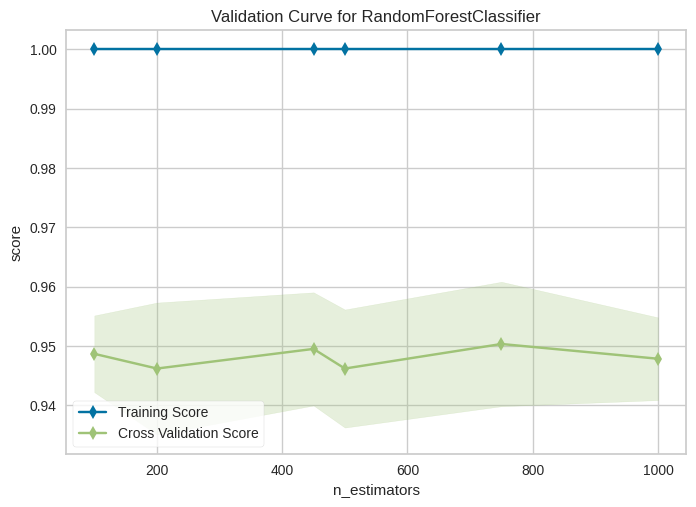

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([ 100,  200,  450,  500,  750, 1000]),
                scoring='accuracy')


In [ ]:
from yellowbrick.model_selection import validation_curve
num_est=[100,200,450,500,750,1000]
print(validation_curve(RandomForestClassifier(),X=x_train,y=y_train,param_name='n_estimators',param_range=num_est,scoring='accuracy',cv=3))

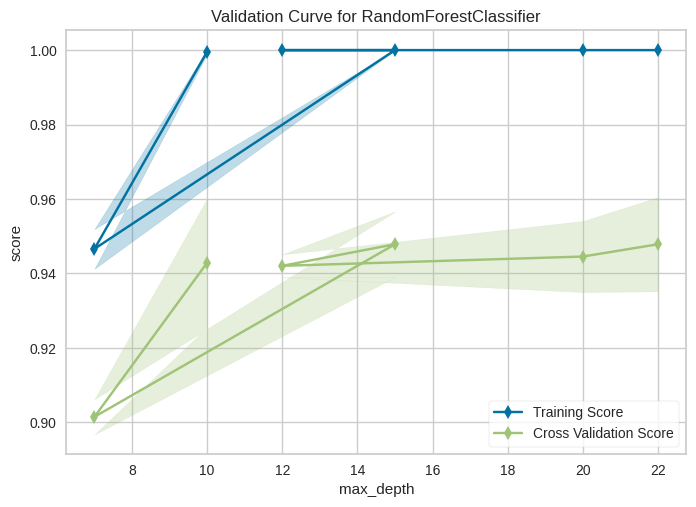

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='max_depth',
                param_range=array([10,  7, 15, 12, 20, 22]),
                scoring='accuracy')


In [ ]:
from yellowbrick.model_selection import validation_curve
dep_vals=[10,7,15,12,20,22]
print(validation_curve(RandomForestClassifier(),X=x_train,y=y_train,param_name='max_depth',param_range=dep_vals,scoring='accuracy',cv=3))

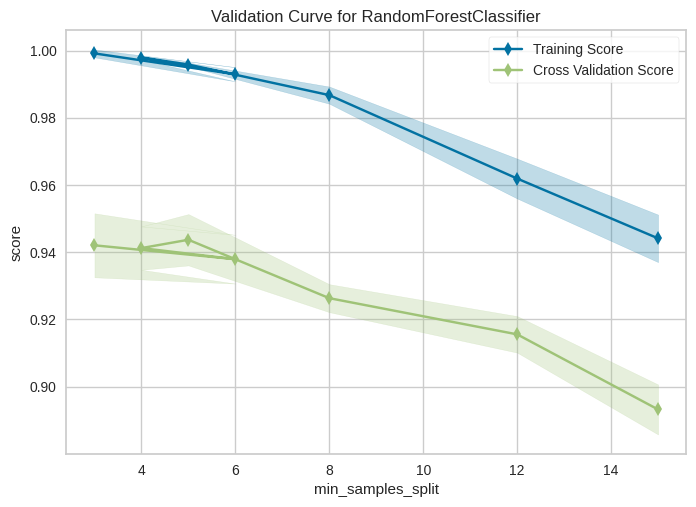

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='min_samples_split',
                param_range=array([ 3,  6,  4,  5,  8, 12, 15]),
                scoring='accuracy')


In [ ]:
min_samples=[3,6,4,5,8,12,15]
print(validation_curve(RandomForestClassifier(),X=x_train,y=y_train,param_name='min_samples_split',param_range=min_samples,scoring='accuracy',cv=3))

In [ ]:
c2=RandomForestClassifier(n_estimators=1000,max_depth=15,min_samples_split=3,random_state=0)
c2.fit(x_train,y_train)
p2=c2.predict(x_test)
print(accuracy_score(p2,y_test))


0.9653179190751445


In [ ]:
f2=pd.Series(c2.feature_importances_,index=x_train.columns).sort_values(ascending=False)
print(f2)



safety     0.285888
person     0.236649
buying     0.173383
maint      0.149737
luhboot    0.086017
doors      0.068326
dtype: float64


Text(0.5, 0, 'Features importance score')

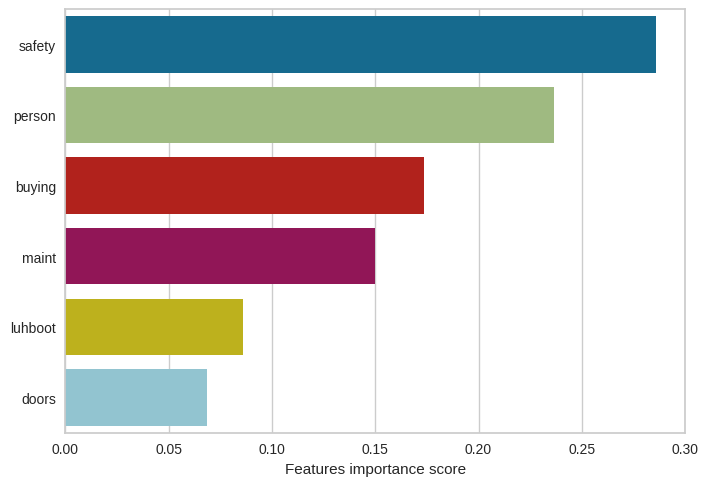

In [ ]:
sns.barplot(x=f2,y=f2.index)
plt.xlabel("Features importance score")

In [ ]:
c3=RandomForestClassifier()
xn=df.drop(['doors','luhboot','maint'],axis=1)
yn=df['class']
x_trainn,x_testn,y_trainn,y_testn=train_test_split(xn,yn,test_size=0.3)
c3.fit(x_trainn,y_trainn)
new_pred=c3.predict(x_testn)

In [ ]:
accuracy_score(new_pred,y_testn)

1.0

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = a1

plt.hist(x)
plt.show()
